Top 5 tarefas por benefício:
   id             nome  beneficio
0  21   Sessão terapia          9
1   2   Reunião equipe          9
2  19  Cozinhar jantar          8
3  10   Revisar código          8
4   8  Planejar sprint          8

Melhor benefício total: 51
Tarefas escolhidas (ids): [21, 20, 18, 15, 13, 8, 6, 3]
    id                nome  dur_min  beneficio
2    3           Meditação       15          5
5    6        Call cliente       30          7
7    8     Planejar sprint       45          8
12  13   Telefonar família       25          7
14  15       Dormir soneca       20          4
17  18  Atualizar planilha       25          5
19  20          Networking       30          6
20  21      Sessão terapia       50          9

Arquivos salvos: tarefas_ordenadas_beneficio.csv, tarefas_todas.csv, resumo_agenda.txt


C:\Users\guivi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


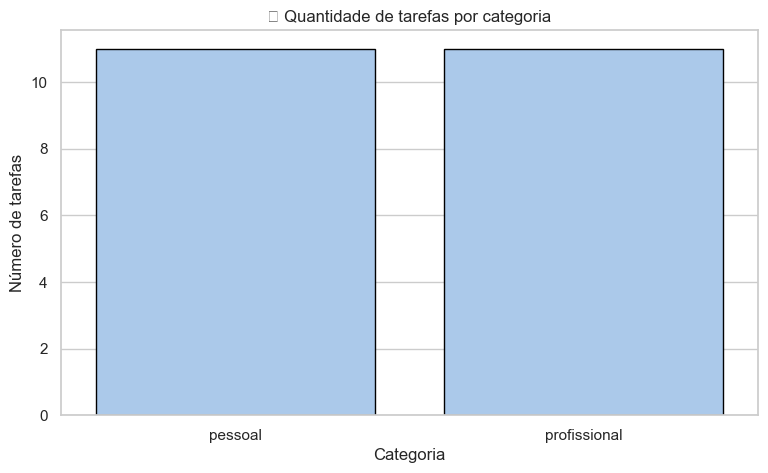

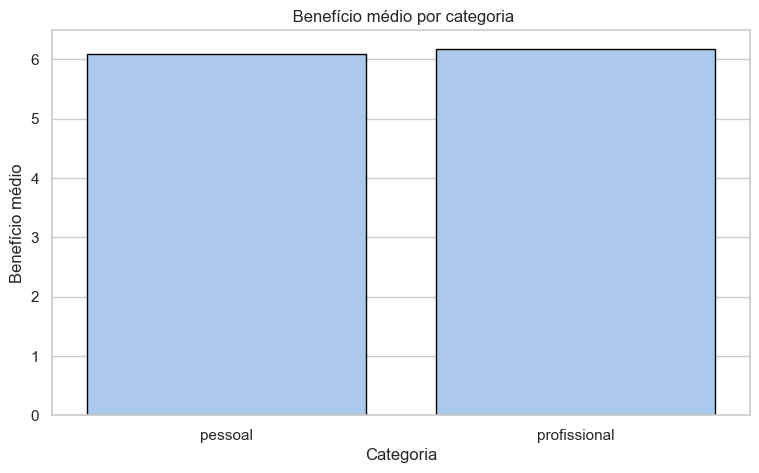

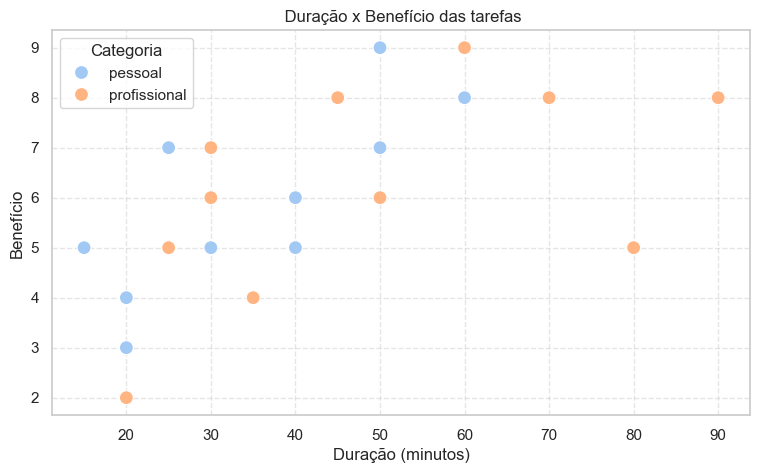

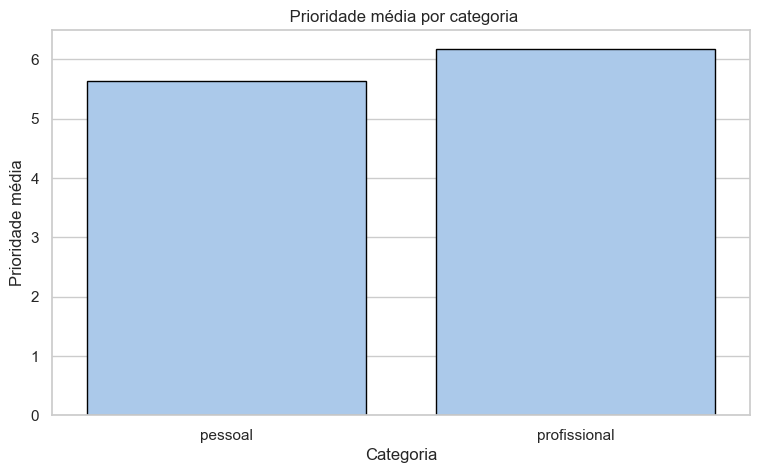

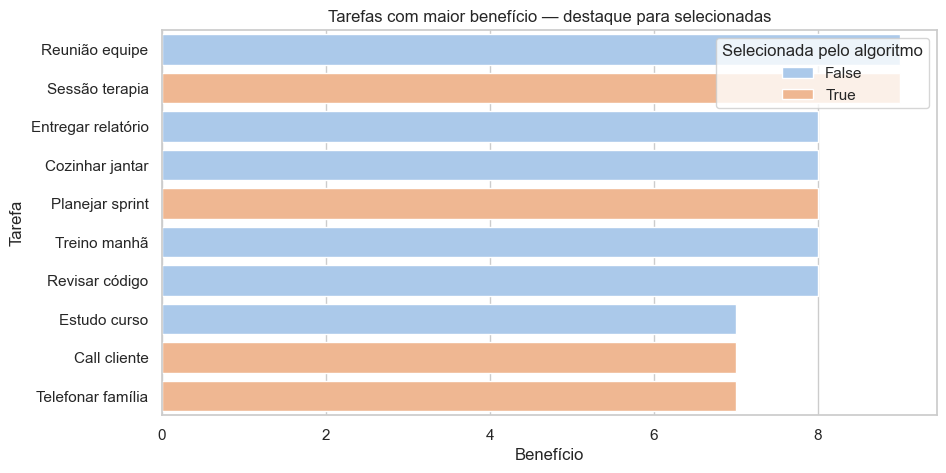

In [6]:
# --- Bibliotecas ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (9, 5)

# 1) Dados de exemplo (>=20 linhas)
dados = [
    {"id":1,  "nome":"Treino manhã","categoria":"pessoal","dur_min":45, "prioridade":7, "beneficio":8},
    {"id":2,  "nome":"Reunião equipe","categoria":"profissional","dur_min":60,"prioridade":9, "beneficio":9},
    {"id":3,  "nome":"Meditação","categoria":"pessoal","dur_min":15, "prioridade":5, "beneficio":5},
    {"id":4,  "nome":"Entregar relatório","categoria":"profissional","dur_min":90,"prioridade":8, "beneficio":8},
    {"id":5,  "nome":"Almoço saudável","categoria":"pessoal","dur_min":40,"prioridade":6, "beneficio":6},
    {"id":6,  "nome":"Call cliente","categoria":"profissional","dur_min":30,"prioridade":8, "beneficio":7},
    {"id":7,  "nome":"Estudo curso","categoria":"pessoal","dur_min":50,"prioridade":6, "beneficio":7},
    {"id":8,  "nome":"Planejar sprint","categoria":"profissional","dur_min":45,"prioridade":7, "beneficio":8},
    {"id":9,  "nome":"Pagar contas","categoria":"pessoal","dur_min":20,"prioridade":4, "beneficio":3},
    {"id":10, "nome":"Revisar código","categoria":"profissional","dur_min":70,"prioridade":7, "beneficio":8},
    {"id":11, "nome":"Caminhada","categoria":"pessoal","dur_min":30,"prioridade":5, "beneficio":5},
    {"id":12, "nome":"Mentoria","categoria":"profissional","dur_min":50,"prioridade":6, "beneficio":6},
    {"id":13, "nome":"Telefonar família","categoria":"pessoal","dur_min":25,"prioridade":6, "beneficio":7},
    {"id":14, "nome":"Backup dados","categoria":"profissional","dur_min":20,"prioridade":3, "beneficio":2},
    {"id":15, "nome":"Dormir soneca","categoria":"pessoal","dur_min":20,"prioridade":4, "beneficio":4},
    {"id":16, "nome":"Organizar e-mail","categoria":"profissional","dur_min":35,"prioridade":5, "beneficio":4},
    {"id":17, "nome":"Ler artigo","categoria":"pessoal","dur_min":40,"prioridade":4, "beneficio":5},
    {"id":18, "nome":"Atualizar planilha","categoria":"profissional","dur_min":25,"prioridade":5, "beneficio":5},
    {"id":19, "nome":"Cozinhar jantar","categoria":"pessoal","dur_min":60,"prioridade":7, "beneficio":8},
    {"id":20, "nome":"Networking","categoria":"profissional","dur_min":30,"prioridade":6, "beneficio":6},
    {"id":21, "nome":"Sessão terapia","categoria":"pessoal","dur_min":50,"prioridade":8, "beneficio":9},
    {"id":22, "nome":"Atualizar portfólio","categoria":"profissional","dur_min":80,"prioridade":4, "beneficio":5},
]
df = pd.DataFrame(dados)

# 2) Merge sort simples
def merge_sort_lista(itens, chave):
    if len(itens) <= 1:
        return itens
    meio = len(itens) // 2
    esquerda = merge_sort_lista(itens[:meio], chave)
    direita = merge_sort_lista(itens[meio:], chave)

    mesclado = []
    i = j = 0

    while i < len(esquerda) and j < len(direita):
        if esquerda[i][chave] <= direita[j][chave]:
            mesclado.append(esquerda[i]); i += 1
        else:
            mesclado.append(direita[j]); j += 1

    mesclado.extend(esquerda[i:])
    mesclado.extend(direita[j:])
    return mesclado

# ordenar por benefício (decrescente)
ordenado_por_benef = merge_sort_lista(df.to_dict('records'), chave='beneficio')[::-1]
df_ordenado = pd.DataFrame(ordenado_por_benef)

print("Top 5 tarefas por benefício:")
print(df_ordenado.head(5)[['id','nome','beneficio']])

# 3) Programação dinâmica — Mochila 0/1
def melhor_agenda(tarefas, limite_tempo):
    memo = {}

    def melhor(i, resto):
        if i >= len(tarefas) or resto <= 0:
            return 0, []

        chave = (i, resto)
        if chave in memo:
            return memo[chave]

        dur = tarefas[i]['dur_min']
        ben = tarefas[i]['beneficio']

        val_pular, lst_pular = melhor(i+1, resto)

        val_pegar, lst_pegar = (0, [])
        if dur <= resto:
            v, l = melhor(i+1, resto - dur)
            val_pegar, lst_pegar = ben + v, l + [tarefas[i]['id']]

        memo[chave] = (val_pegar, lst_pegar) if val_pegar > val_pular else (val_pular, lst_pular)
        return memo[chave]

    return melhor(0, limite_tempo)

tarefas_dp = df[['id','dur_min','beneficio']].to_dict('records')
melhor_valor, melhores_ids = melhor_agenda(tarefas_dp, 240)

print("\nMelhor benefício total:", melhor_valor)
print("Tarefas escolhidas (ids):", melhores_ids)
print(df[df['id'].isin(melhores_ids)][['id','nome','dur_min','beneficio']])

# 4) Salvar arquivos
df_ordenado.to_csv('tarefas_ordenadas_beneficio.csv', index=False)
df.to_csv('tarefas_todas.csv', index=False)

with open('resumo_agenda.txt', 'w', encoding='utf-8') as f:
    f.write(f"Limite de tempo: 240 minutos\nMelhor benefício: {melhor_valor}\nTarefas selecionadas: {melhores_ids}\n")

print("\nArquivos salvos: tarefas_ordenadas_beneficio.csv, tarefas_todas.csv, resumo_agenda.txt")


# -----------------------  GRÁFICOS  -------------------------


# --- Gráfico — Distribuição por categoria ---
plt.figure()
sns.countplot(data=df, x='categoria', edgecolor='black')
plt.title("📊 Quantidade de tarefas por categoria")
plt.xlabel("Categoria")
plt.ylabel("Número de tarefas")



plt.show()

# --- Gráfico — Benefício médio ---
plt.figure()
sns.barplot(data=df, x='categoria', y='beneficio', estimator='mean', errorbar=None, edgecolor='black')
plt.title(" Benefício médio por categoria")
plt.xlabel("Categoria")
plt.ylabel("Benefício médio")
plt.show()

# ---  Gráfico — Duração x Benefício ---
plt.figure()
sns.scatterplot(data=df, x='dur_min', y='beneficio', hue='categoria', s=100)
plt.title(" Duração x Benefício das tarefas")
plt.xlabel("Duração (minutos)")
plt.ylabel("Benefício")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Categoria")
plt.show()

# --- 4️ Gráfico — Prioridade média ---
plt.figure()
sns.barplot(data=df, x='categoria', y='prioridade', estimator='mean', errorbar=None, edgecolor='black')
plt.title(" Prioridade média por categoria")
plt.xlabel("Categoria")
plt.ylabel("Prioridade média")
plt.show()

# ---  Gráfico — Tarefas selecionadas ---
df['selecionada'] = df['id'].isin(melhores_ids)
df_sel = df.sort_values('beneficio', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_sel, x='beneficio', y='nome', hue='selecionada', dodge=False)
plt.title("Tarefas com maior benefício — destaque para selecionadas")
plt.xlabel("Benefício")
plt.ylabel("Tarefa")
plt.legend(title="Selecionada pelo algoritmo")
plt.show()
